# CLUSTERING MADRID: WHERE TO OPEN A NEW RESTAURANT

### 1. Problem Description

In this project, the problem attempted to solve will be to find the best possible location or the most optimal, for a new restaurant in the city of Madrid, Spain. To achieve this task, an analytical approach will be used, based on advanced machine learning techniques and data analysis, concretely clustering and perhaps some data visualization techniques.

During the process of analysis, several data transformations will be performed, in order the find the best possible data format for the machine learning model to ingest. Once the data is set up and prepared, a modeling process will be carried out, and this statistical analysis will provide the best possible places to locate a new bussies in the city of Madrid.

### 2. Importing libraries

First of all, lets get the libraries that we will use to solve the problem below.

In [1]:
#IMPORTAR LIBRERIAS
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

from geopy.geocoders import Nominatim 
import geocoder
import requests 
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


import folium 


from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import wget

from math import sqrt, pi

print('Libraries imported.')


Libraries imported.


### 3. Data aquisition


The data that will be used to develop this project is based on two sites:

1. The Foursquare Api: This data will be accesed via Python, and used to obtain the most common venues per neighborhood in the city of Madrid. This way, it is possible to have a taste of how the city's venues are distributed, what are the most common places for leisure, and in general, it will provide an idea of what people's likes are.

2. The Madrid City Hall's Web Portal: This site provides several data sources of great utility to solve this problem. The files are provided in Excel format, and they are built over a statstical exploitation and use basis. In this case we will use the dsitricts location data and boundaries.
You can access the data by clicking this link:
'https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/Distritos-en-cifras/Distritos-en-cifras-Informacion-de-Distritos-/?vgnextfmt=default&vgnextoid=74b33ece5284c310VgnVCM1000000b205a0aRCRD&vgnextchannel=27002d05cb71b310VgnVCM1000000b205a0aRCRD'



In [2]:
distritos_df = pd.read_csv('C:/Users/NITROPC/Desktop/DATA SCIENCE/CERTIFICACION IBM/09 - PROYECTO FINAL/04 - CAPSTONE/DATA/distritos.csv', sep = ';')

Let´s see what´s in the dataframe.

In [3]:
distritos_df


,OBJECTID,Shape_Leng,Shape_Area,COD_DIS,COD_DIS_TX,DISTRI_MAY,NOMBRE,DISTRI_MT
0,11,"10304,07973","5228246,741",1,1,CENTRO,Centro,CENTRO
1,6,"12806,76426","6462175,63",2,2,ARGANZUELA,Arganzuela,ARGANZUELA
2,9,"9523,885329","5466211,164",3,3,RETIRO,Retiro,RETIRO
3,12,"10866,33577","5392403,428",4,4,SALAMANCA,Salamanca,SALAMANCA
4,17,"13396,81708","9175481,878",5,5,CHAMARTIN,Chamart�n,CHAMART�N
5,15,"9919,059595","5374724,446",6,6,TETUAN,Tetu�n,TETU�N
6,13,"9019,542776","4679185,047",7,7,CHAMBERI,Chamber�,CHAMBER�
7,21,"94482,14556","237838370,4",8,8,FUENCARRAL - EL PARDO,Fuencarral - El Pardo,FUENCARRAL - EL PARDO
8,16,"41034,34336","46531136,2",9,9,MONCLOA - ARAVACA,Moncloa - Aravaca,MONCLOA - ARAVACA
9,7,"28181,05527","25427202,6",10,10,LATINA,Latina,LATINA


There are a couple of columns that we will not need to solve our ploblem. So let´s clean our dataframe.

In [4]:
distritos_df = distritos_df.drop(['OBJECTID', 'Shape_Leng', 'COD_DIS_TX', 'DISTRI_MAY', 'DISTRI_MT'], axis = 1)
distritos_df = distritos_df.rename(columns = {'Shape_Area' : 'area', 'COD_DIS' : 'cod', 'NOMBRE' : 'District'})


In [5]:
distritos_df = distritos_df.reindex(columns = ['cod', 'District', 'area'])
distritos_df

,cod,District,area
0,1,Centro,"5228246,741"
1,2,Arganzuela,"6462175,63"
2,3,Retiro,"5466211,164"
3,4,Salamanca,"5392403,428"
4,5,Chamart�n,"9175481,878"
5,6,Tetu�n,"5374724,446"
6,7,Chamber�,"4679185,047"
7,8,Fuencarral - El Pardo,"237838370,4"
8,9,Moncloa - Aravaca,"46531136,2"
9,10,Latina,"25427202,6"


In [6]:
distritos_df['area'] = [float(x.replace(',','.')) for x in distritos_df['area']]


In [7]:
distritos_df['Area_km2'] = round(distritos_df['area']/1000000, 2)
distritos_df.drop('area', axis =1, inplace = True)
distritos_df

,cod,District,Area_km2
0,1,Centro,5.23
1,2,Arganzuela,6.46
2,3,Retiro,5.47
3,4,Salamanca,5.39
4,5,Chamart�n,9.18
5,6,Tetu�n,5.37
6,7,Chamber�,4.68
7,8,Fuencarral - El Pardo,237.84
8,9,Moncloa - Aravaca,46.53
9,10,Latina,25.43


Now we can see that there are some districts with a wrong name. Let´s name them in the correct way.

In [8]:
distritos_df['District'].iloc[[4]] = 'Chamartin'
distritos_df['District'].iloc[[5]] = 'Tetuan'
distritos_df['District'].iloc[[6]] = 'Chamberi'
distritos_df['District'].iloc[[18]] = 'Vicalvaro'

C:\Users\NITROPC\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Now, we need to create a data frame with the coordinates of each district.

In [9]:
coordinates_df = pd.DataFrame( data = {

'District' : ['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartin',
                'Tetuán', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Latina', 'Carabanchel',
                'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
                'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas'],
'Latitude' : ['40.415347', '40.3960833', '40.408072', '40.43', '40.453333', '40.460556', '40.432792', '40.478611', '40.4565887',
                 '40.402461', '40.383669', '40.381336', '40.386548', '40.409869', '40.4373649', '40.469457', '40.345925', '40.3717661', 
                 '40.4042', '40.426001', '40.470196'],
'Longitude' : ['-3.707371', '-3.6938472', '-3.676729', '-3.677778', '-3.6775', '-3.7', '-3.697186', '-3.709722', '-3.7544059', 
                  '-3.741294', '-3.727989', '-3.706856', '-3.6635396', '-3.644436', '-3.6499612', '-3.640482', '-3.709356', '-3.620269', 
                  '-3.60806', '-3.612764', '-3.58489']})

The next step is to concatenate our district dataframe with the coordinates dataframe, et volia:

In [10]:
distritos_df = pd.concat([distritos_df, coordinates_df[['Latitude', 'Longitude']]], axis = 1)

In [11]:
distritos_df

,cod,District,Area_km2,Latitude,Longitude
0,1,Centro,5.23,40.415347,-3.707371
1,2,Arganzuela,6.46,40.3960833,-3.6938472
2,3,Retiro,5.47,40.408072,-3.676729
3,4,Salamanca,5.39,40.43,-3.677778
4,5,Chamartin,9.18,40.453333,-3.6775
5,6,Tetuan,5.37,40.460556,-3.7
6,7,Chamberi,4.68,40.432792,-3.697186
7,8,Fuencarral - El Pardo,237.84,40.478611,-3.709722
8,9,Moncloa - Aravaca,46.53,40.4565887,-3.7544059
9,10,Latina,25.43,40.402461,-3.741294


In [12]:
distritos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cod        21 non-null     int64  
 1   District   21 non-null     object 
 2   Area_km2   21 non-null     float64
 3   Latitude   21 non-null     object 
 4   Longitude  21 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 968.0+ bytes


Some of the data are in a wrong format, so let´s put them in the right way.

In [13]:
distritos_df['Latitude'] = distritos_df['Latitude'].astype('float', errors = 'ignore')
distritos_df['Longitude'] = distritos_df['Longitude'].astype('float', errors = 'ignore')
distritos_df.dtypes

cod            int64
District      object
Area_km2     float64
Latitude     float64
Longitude    float64
dtype: object

Now, it´s time to show our districts in a map. For that, we will use a geojson file.

In [14]:
madrid_geo = r'C:/Users/NITROPC/Desktop/DATA SCIENCE/CERTIFICACION IBM/09 - PROYECTO FINAL/04 - CAPSTONE/DATA/distritos.geojson'

In [15]:
madrid_geo
    


'C:/Users/NITROPC/Desktop/DATA SCIENCE/CERTIFICACION IBM/09 - PROYECTO FINAL/04 - CAPSTONE/DATA/distritos.geojson'

In [16]:
mad_ll=[40.46206,-3.6766]

In [17]:
madrid_map = folium.Map(location = mad_ll, zoom_start = 10)

Let´s see how our districts look in a chorpleth map using the 'Area_km2' column of our dataframe.

In [18]:
madrid_map.choropleth(geo_data = madrid_geo, data = distritos_df, columns = ['District', 'Area_km2'],
                      key_on = 'feature.properties.nombre', fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5, 
                       legend_name='Madrid districts surface area km2')


distritos = folium.map.FeatureGroup()

for lat, lng, label in zip(distritos_df.Latitude, distritos_df.Longitude, distritos_df.District):
    distritos.add_child(
        folium.features.CircleMarker(
            [lat, lng], 
            radius = 5,
            popup = label,
            color = 'yellow', 
            fill = True,
            fill_color = 'blue', fill_opacity = 0.6))
    
latitudes = list(distritos_df.Latitude)
longitudes = list(distritos_df.Longitude)
labels = list(distritos_df.District)

  
    



madrid_map.add_child(distritos)

### 4. SCRAPPING THE WEB

Now it´s time to get  each district venues by using the FourSquare API. 

In [19]:
#getting venues
CLIENT_ID = 'FRYWC2MDRQY302XEHS1Q40MFONKCG52JZOK1CIET233QUMD3' 
CLIENT_SECRET = 'LFFQRNFRCEH4VZYAE2NNV4RAF11WLZEZWDGCF1AN0L44ARDV' 
VERSION = '20210601' 
LIMIT = 100 


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius = 700):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [21]:
madrid_venues=getNearbyVenues(names=distritos_df['District'], latitudes=distritos_df['Latitude'],longitudes=distritos_df['Longitude']
                             )

In [22]:
print(madrid_venues.shape)
madrid_venues.head()

(987, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro,40.415347,-3.707371,The Hat Madrid,40.414343,-3.707120,Hotel
1,Centro,40.415347,-3.707371,La Taberna de Mister Pinkleton,40.414536,-3.708108,Other Nightlife
2,Centro,40.415347,-3.707371,Plaza Mayor,40.415527,-3.707506,Plaza
3,Centro,40.415347,-3.707371,Gyoza Go!,40.416179,-3.708612,Dumpling Restaurant
4,Centro,40.415347,-3.707371,Bodegas Ricla,40.414266,-3.708077,Wine Bar


In [23]:
print("Number of unique venue categories in Madrid districts:{}".format(len(madrid_venues["Venue Category"].unique())))

Number of unique venue categories in Madrid districts:176


Because of the radius overlaping between districs, some venues may be duplicated. So let´s eliminate those venues from our dataframe.

In [24]:
# Dropping duplicated venues from the dataframe
venues_deduplicated = madrid_venues.drop_duplicates(subset='Venue')
print('Number of duplicated venues removed {}'.format(madrid_venues.shape[0]-venues_deduplicated.shape[0]))

Number of duplicated venues removed 75


### 5. ANALIZING DISTRICT VENUES

Let´s analize a little bit our distric venues. For that, we will make a onehot dataframe by using the get_dummies function.

In [25]:
madrid_onehot = pd.get_dummies(venues_deduplicated[['Venue Category']], prefix = '', prefix_sep = '')

madrid_onehot['District'] = venues_deduplicated['District']

fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_onehot.tail()

,District,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Liquor Store,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Optical Shop,Other Nightlife,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trade School,Train,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
982,Barajas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
983,Barajas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
984,Barajas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
985,Barajas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
986,Barajas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Now, let´s group the districts with the number of each venue category.

In [26]:
madrid_grouped = madrid_onehot.groupby('District').sum().reset_index()

In [27]:
madrid_grouped

,District,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Liquor Store,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Optical Shop,Other Nightlife,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trade School,Train,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,Arganzuela,0,1,2,2,1,0,0,0,1,4,2,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,2,0,0,0,1,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,1,2,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,1,0,0,1,2,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,1,0,0,0,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,5,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,Barajas,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,Carabanchel,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centro,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,3,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,0,0,1,0,0,0,0,1,1,4,9,0,3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,0,0,9,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,12,0,0,0,0,0,0,11,0,0,0,2,0,0,0,0,0,0,1,0,0,0,1
4,Chamartin,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Let´s get the top 5 venues by district.

In [28]:
#top 5 venues by district

num_top_venues = 5

for district in madrid_grouped['District']:
    print("----"+district+"----")
    temp = madrid_grouped[madrid_grouped['District'] == district].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arganzuela----
                venue  freq
0  Spanish Restaurant   6.0
1          Restaurant   5.0
2    Tapas Restaurant   5.0
3              Bakery   4.0
4         Beer Garden   3.0


----Barajas----
                    venue  freq
0                   Hotel   9.0
1      Spanish Restaurant   5.0
2             Coffee Shop   3.0
3              Restaurant   3.0
4  Argentinian Restaurant   2.0


----Carabanchel----
                  venue  freq
0                 Plaza   2.0
1         Metro Station   2.0
2                Bakery   2.0
3         Grocery Store   2.0
4  Colombian Restaurant   1.0


----Centro----
                venue  freq
0  Spanish Restaurant  12.0
1    Tapas Restaurant  11.0
2               Plaza   9.0
3               Hotel   9.0
4              Hostel   4.0


----Chamartin----
                venue  freq
0  Spanish Restaurant  11.0
1          Restaurant  11.0
2    Tapas Restaurant   3.0
3           Gastropub   3.0
4         Pizza Place   3.0


----Chamberi----
         

And now, let´s get the top 10 venue categoriesin all districts combined and plot them in a barplot.

In [29]:
# Getting the top 10 venue categories in all districts combined
venue_count = venues_deduplicated[['District', 'Venue Category']].groupby('Venue Category').count()
venue_top10 = venue_count.sort_values(by='District', ascending=False).rename(columns={'District':'Count'}).head(10)
venue_top10.reset_index(drop=False, inplace=True)
venue_top10

,Venue Category,Count
0,Spanish Restaurant,115
1,Restaurant,64
2,Tapas Restaurant,44
3,Bar,40
4,Plaza,33
5,Hotel,28
6,Coffee Shop,21
7,Café,21
8,Bakery,21
9,Gym,16


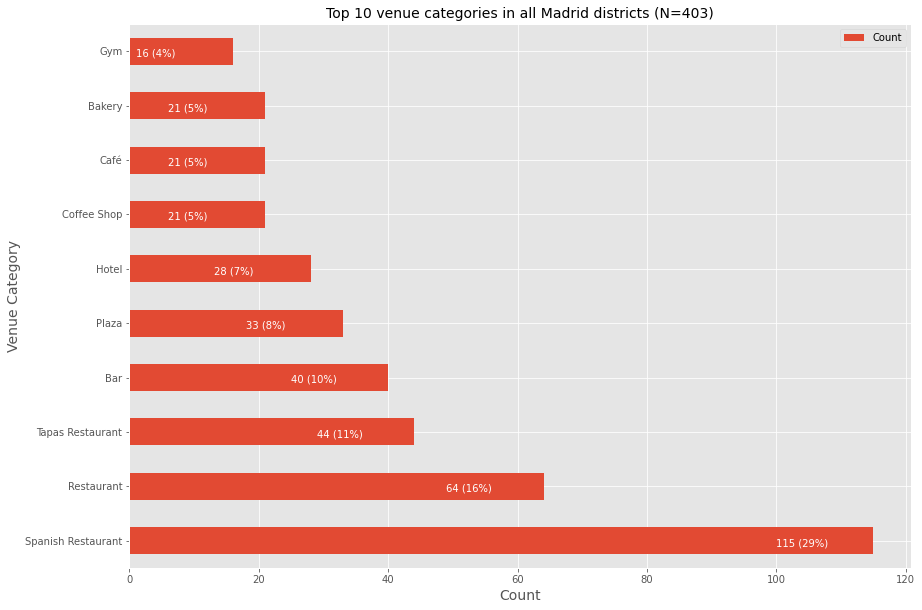

In [30]:
# Plotting bar chart
plt.style.use('ggplot')
venue_top10.plot(kind='barh', x='Venue Category', y='Count', figsize=(14,10))
plt.xlabel('Count', fontsize=14)
plt.ylabel('Venue Category', fontsize=14)
plt.title(f'Top 10 venue categories in all Madrid districts (N={venue_top10.Count.sum()})', fontsize=14)

for index, count in zip (venue_top10.index, venue_top10.Count):
    plt.annotate(f'{count} ({round(count/venue_top10.Count.sum()*100)}%)', xy=(count - 15, index-0.1), color="white")

plt.show()

As we can see, most of the venues are related with restoration: restaurant, bar, tapas bar, etc.

Now it´s time to order our district venues in descending order.

In [31]:
#sort venues in descendign order

def most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venues'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venues'.format(ind+1))

district_venues_sorted = pd.DataFrame(columns = columns)
district_venues_sorted['District'] = madrid_grouped['District']

for ind in np.arange(madrid_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted

,District,1st Most Common Venues,2nd Most Common Venues,3rd Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
0,Arganzuela,Spanish Restaurant,Restaurant,Tapas Restaurant,Bakery,Beer Garden,Plaza,Mediterranean Restaurant,Gym / Fitness Center,Dessert Shop,Café
1,Barajas,Hotel,Spanish Restaurant,Coffee Shop,Restaurant,Argentinian Restaurant,Tapas Restaurant,Wine Bar,Deli / Bodega,Grocery Store,Supermarket
2,Carabanchel,Plaza,Metro Station,Bakery,Grocery Store,Colombian Restaurant,Soccer Field,Café,Nightclub,Spanish Restaurant,Mobile Phone Shop
3,Centro,Spanish Restaurant,Tapas Restaurant,Plaza,Hotel,Hostel,Ice Cream Shop,Mexican Restaurant,Cocktail Bar,Pastry Shop,Gourmet Shop
4,Chamartin,Spanish Restaurant,Restaurant,Tapas Restaurant,Gastropub,Pizza Place,Plaza,Grocery Store,Café,Mexican Restaurant,Bar
5,Chamberi,Restaurant,Spanish Restaurant,Plaza,Bar,Tapas Restaurant,Café,Brewery,Mediterranean Restaurant,Japanese Restaurant,Hotel
6,Ciudad Lineal,Spanish Restaurant,Tapas Restaurant,Restaurant,Bar,Park,Bakery,Plaza,Fast Food Restaurant,Sporting Goods Shop,Clothing Store
7,Fuencarral - El Pardo,Restaurant,Bar,Tapas Restaurant,Fast Food Restaurant,Café,Park,Spanish Restaurant,Clothing Store,Gym / Fitness Center,Video Game Store
8,Hortaleza,Spanish Restaurant,Plaza,Restaurant,Gym,Pizza Place,Pharmacy,Pub,Cosmetics Shop,Shopping Mall,Snack Place
9,Latina,Pizza Place,Lake,Student Center,Scenic Lookout,Tapas Restaurant,Metro Station,Sandwich Place,Gym,Park,Fast Food Restaurant


### 6. GETTING CLUSTERS

Now, it´s time to clustering. We will use the Kmeans function from SciKiLearn library. First, we will get our optimal k by analizing the score of KMeans.
    

C:\Users\NITROPC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


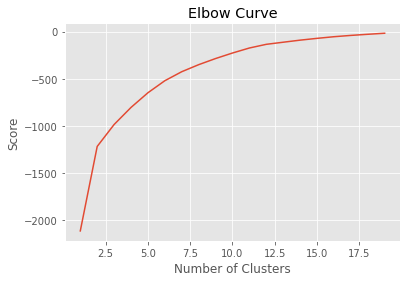

In [33]:
#optimal_k

madrid_grouped_clustering = madrid_grouped.drop('District', 1)

plt.style.use('ggplot')
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(madrid_grouped_clustering).score(madrid_grouped_clustering) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()





In [34]:
#optimal k = 5

kclusters = 5

kmeans = KMeans(n_clusters=kclusters, random_state = 0).fit(madrid_grouped_clustering)
kmeans.labels_[0:10]

array([0, 0, 3, 4, 2, 2, 0, 3, 0, 3])

In [35]:
#segment the districts by most common venues

madrid_merged = distritos_df

madrid_merged['Cluster labels'] = kmeans.labels_

madrid_merged = madrid_merged.join(district_venues_sorted.set_index('District'), on = 'District')
madrid_merged[['Latitude', 'Longitude']] = coordinates_df[['Latitude', 'Longitude']]
madrid_merged['Latitude'] = madrid_merged['Latitude'].astype(float)
madrid_merged['Longitude'] = madrid_merged['Longitude'].astype(float)
print(madrid_merged.shape)
madrid_merged.head()


(21, 16)


,cod,District,Area_km2,Latitude,Longitude,Cluster labels,1st Most Common Venues,2nd Most Common Venues,3rd Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
0,1,Centro,5.23,40.415347,-3.707371,0,Spanish Restaurant,Tapas Restaurant,Plaza,Hotel,Hostel,Ice Cream Shop,Mexican Restaurant,Cocktail Bar,Pastry Shop,Gourmet Shop
1,2,Arganzuela,6.46,40.396083,-3.693847,0,Spanish Restaurant,Restaurant,Tapas Restaurant,Bakery,Beer Garden,Plaza,Mediterranean Restaurant,Gym / Fitness Center,Dessert Shop,Café
2,3,Retiro,5.47,40.408072,-3.676729,3,Spanish Restaurant,Bar,Café,Hotel,Brewery,Pizza Place,Museum,Grocery Store,Gym,Plaza
3,4,Salamanca,5.39,40.430000,-3.677778,4,Spanish Restaurant,Restaurant,Seafood Restaurant,Mediterranean Restaurant,Boutique,Burger Joint,Tapas Restaurant,Coffee Shop,Bakery,Bar
4,5,Chamartin,9.18,40.453333,-3.677500,2,Spanish Restaurant,Restaurant,Tapas Restaurant,Gastropub,Pizza Place,Plaza,Grocery Store,Café,Mexican Restaurant,Bar


In [36]:
madrid_merged

,cod,District,Area_km2,Latitude,Longitude,Cluster labels,1st Most Common Venues,2nd Most Common Venues,3rd Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
0,1,Centro,5.23,40.415347,-3.707371,0,Spanish Restaurant,Tapas Restaurant,Plaza,Hotel,Hostel,Ice Cream Shop,Mexican Restaurant,Cocktail Bar,Pastry Shop,Gourmet Shop
1,2,Arganzuela,6.46,40.396083,-3.693847,0,Spanish Restaurant,Restaurant,Tapas Restaurant,Bakery,Beer Garden,Plaza,Mediterranean Restaurant,Gym / Fitness Center,Dessert Shop,Café
2,3,Retiro,5.47,40.408072,-3.676729,3,Spanish Restaurant,Bar,Café,Hotel,Brewery,Pizza Place,Museum,Grocery Store,Gym,Plaza
3,4,Salamanca,5.39,40.430000,-3.677778,4,Spanish Restaurant,Restaurant,Seafood Restaurant,Mediterranean Restaurant,Boutique,Burger Joint,Tapas Restaurant,Coffee Shop,Bakery,Bar
4,5,Chamartin,9.18,40.453333,-3.677500,2,Spanish Restaurant,Restaurant,Tapas Restaurant,Gastropub,Pizza Place,Plaza,Grocery Store,Café,Mexican Restaurant,Bar
5,6,Tetuan,5.37,40.460556,-3.700000,2,Spanish Restaurant,Restaurant,Coffee Shop,Tapas Restaurant,Bar,Asian Restaurant,Hotel,Breakfast Spot,Gym,Grocery Store
6,7,Chamberi,4.68,40.432792,-3.697186,0,Restaurant,Spanish Restaurant,Plaza,Bar,Tapas Restaurant,Café,Brewery,Mediterranean Restaurant,Japanese Restaurant,Hotel
7,8,Fuencarral - El Pardo,237.84,40.478611,-3.709722,3,Restaurant,Bar,Tapas Restaurant,Fast Food Restaurant,Café,Park,Spanish Restaurant,Clothing Store,Gym / Fitness Center,Video Game Store
8,9,Moncloa - Aravaca,46.53,40.456589,-3.754406,0,Golf Course,Fast Food Restaurant,Café,Tennis Court,American Restaurant,Noodle House,Opera House,Optical Shop,Other Nightlife,Paella Restaurant
9,10,Latina,25.43,40.402461,-3.741294,3,Pizza Place,Lake,Student Center,Scenic Lookout,Tapas Restaurant,Metro Station,Sandwich Place,Gym,Park,Fast Food Restaurant


Once we have all our district in a cluster, let´s see how they look in a map.

In [37]:
map_clusters = folium.Map(location=mad_ll, zoom_start=11)
map_clusters.choropleth(geo_data = madrid_geo,fill_opacity=0.3)



#set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['District'], madrid_merged['Cluster labels']):
                                                                                                   
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
     
map_clusters

### 7. EXPLORING THE CLUSTERS

It´s time to explore each of our clusters. We will get the districts in each cluster, and plot a WordCloud to see the most common venues in each cluster

Cluster 0

In [38]:
cluster_0 = madrid_merged.loc[madrid_merged['Cluster labels'] == 0, madrid_merged.columns[[1] + list(range(6, madrid_merged.shape[1]))]]

In [39]:
cluster_0

,District,1st Most Common Venues,2nd Most Common Venues,3rd Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
0,Centro,Spanish Restaurant,Tapas Restaurant,Plaza,Hotel,Hostel,Ice Cream Shop,Mexican Restaurant,Cocktail Bar,Pastry Shop,Gourmet Shop
1,Arganzuela,Spanish Restaurant,Restaurant,Tapas Restaurant,Bakery,Beer Garden,Plaza,Mediterranean Restaurant,Gym / Fitness Center,Dessert Shop,Café
6,Chamberi,Restaurant,Spanish Restaurant,Plaza,Bar,Tapas Restaurant,Café,Brewery,Mediterranean Restaurant,Japanese Restaurant,Hotel
8,Moncloa - Aravaca,Golf Course,Fast Food Restaurant,Café,Tennis Court,American Restaurant,Noodle House,Opera House,Optical Shop,Other Nightlife,Paella Restaurant


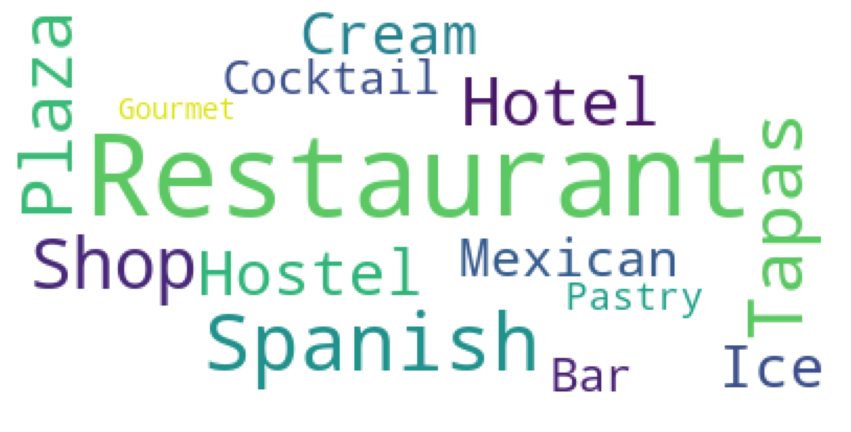

In [40]:
list_venues = []
for index, row in cluster_0.iterrows():
    #loop over top 10 venues:
    for i in range(1,11):
        #let's create a ponderation to take into account the order
        #that is, we add several times the same word based on the order
        #(it would be more accurate to weight by the actual number of occurances)
        for k in range(0,i):
            list_venues.append(cluster_0.iloc[0, -i])
list_venues = (" ").join(list_venues)

# instantiate a word cloud object\n",
cluster0_wc = WordCloud(collocations=False, background_color='white', max_words=2000)
cluster0_wc.generate(list_venues)

plt.figure(figsize=(15,8))
plt.imshow(cluster0_wc)
plt.axis("off")
plt.savefig("cluster0.png", bbox_inches='tight')

Cluster 1

In [41]:
cluster_1 = madrid_merged.loc[madrid_merged['Cluster labels'] == 1, madrid_merged.columns[[1] + list(range(6, madrid_merged.shape[1]))]]

In [42]:
cluster_1

,District,1st Most Common Venues,2nd Most Common Venues,3rd Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
13,Moratalaz,Bar,Park,Ice Cream Shop,Plaza,Coffee Shop,Café,Nightclub,Brewery,Breakfast Spot,Pub
14,Ciudad Lineal,Spanish Restaurant,Tapas Restaurant,Restaurant,Bar,Park,Bakery,Plaza,Fast Food Restaurant,Sporting Goods Shop,Clothing Store
16,Villaverde,Train Station,Spanish Restaurant,Mediterranean Restaurant,Café,Diner,Gastropub,Mobile Phone Shop,Metro Station,Design Studio,Train


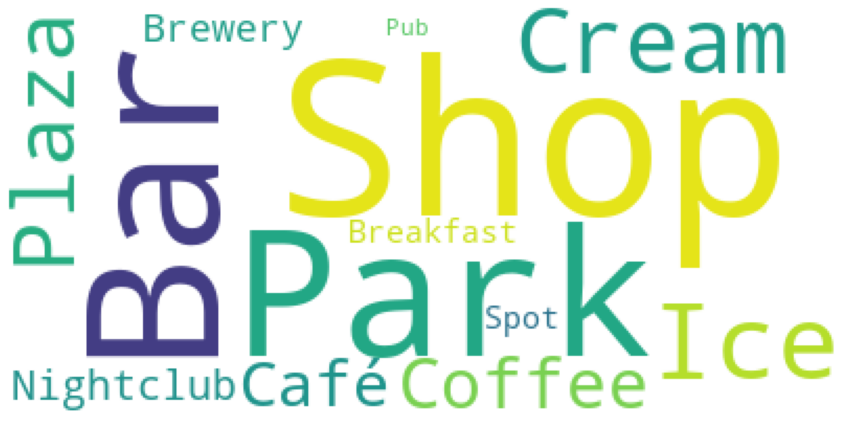

In [43]:
list_venues = []
for index, row in cluster_1.iterrows():
    #loop over top 10 venues:
    for i in range(1,11):
        #let's create a ponderation to take into account the order
        #that is, we add several times the same word based on the order
        #(it would be more accurate to weight by the actual number of occurances)
        for k in range(0,i):
            list_venues.append(cluster_1.iloc[0, -i])
list_venues = (" ").join(list_venues)

# instantiate a word cloud object\n",
cluster1_wc = WordCloud(collocations=False, background_color='white', max_words=2000)
cluster1_wc.generate(list_venues)

plt.figure(figsize=(15,8))
plt.imshow(cluster1_wc)
plt.axis("off")
plt.savefig("cluster1.png", bbox_inches='tight')

Cluster 2

In [44]:
cluster_2 = madrid_merged.loc[madrid_merged['Cluster labels'] == 2, madrid_merged.columns[[1] + list(range(6, madrid_merged.shape[1]))]]

In [45]:
cluster_2

,District,1st Most Common Venues,2nd Most Common Venues,3rd Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
4,Chamartin,Spanish Restaurant,Restaurant,Tapas Restaurant,Gastropub,Pizza Place,Plaza,Grocery Store,Café,Mexican Restaurant,Bar
5,Tetuan,Spanish Restaurant,Restaurant,Coffee Shop,Tapas Restaurant,Bar,Asian Restaurant,Hotel,Breakfast Spot,Gym,Grocery Store


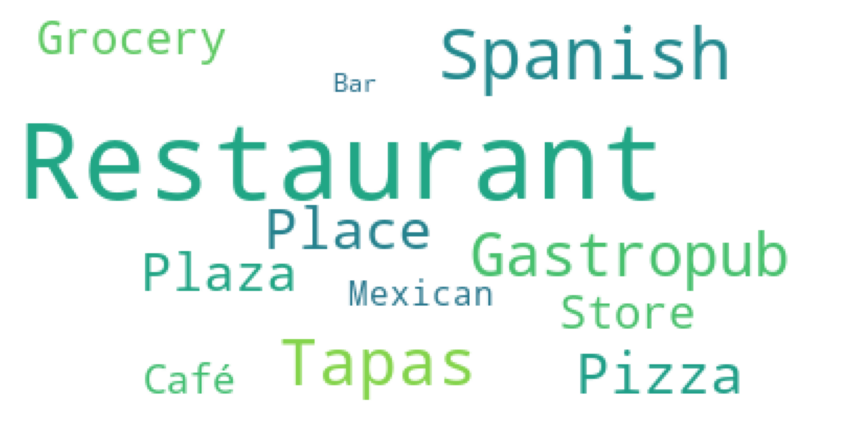

In [46]:
list_venues = []
for index, row in cluster_2.iterrows():
    #loop over top 10 venues:
    for i in range(1,11):
        #let's create a ponderation to take into account the order
        #that is, we add several times the same word based on the order
        #(it would be more accurate to weight by the actual number of occurances)
        for k in range(0,i):
            list_venues.append(cluster_2.iloc[0, -i])
list_venues = (" ").join(list_venues)

# instantiate a word cloud object\n",
cluster2_wc = WordCloud(collocations=False, background_color='white', max_words=2000)
cluster2_wc.generate(list_venues)

plt.figure(figsize=(15,8))
plt.imshow(cluster2_wc)
plt.axis("off")
plt.savefig("cluster2.png", bbox_inches='tight')

Cluster 3

In [47]:
cluster_3 = madrid_merged.loc[madrid_merged['Cluster labels'] == 3, madrid_merged.columns[[1] + list(range(6, madrid_merged.shape[1]))]]

In [48]:
cluster_3

,District,1st Most Common Venues,2nd Most Common Venues,3rd Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
2,Retiro,Spanish Restaurant,Bar,Café,Hotel,Brewery,Pizza Place,Museum,Grocery Store,Gym,Plaza
7,Fuencarral - El Pardo,Restaurant,Bar,Tapas Restaurant,Fast Food Restaurant,Café,Park,Spanish Restaurant,Clothing Store,Gym / Fitness Center,Video Game Store
9,Latina,Pizza Place,Lake,Student Center,Scenic Lookout,Tapas Restaurant,Metro Station,Sandwich Place,Gym,Park,Fast Food Restaurant
10,Carabanchel,Plaza,Metro Station,Bakery,Grocery Store,Colombian Restaurant,Soccer Field,Café,Nightclub,Spanish Restaurant,Mobile Phone Shop
11,Usera,Seafood Restaurant,Chinese Restaurant,Theater,Nightclub,Restaurant,Bakery,Spanish Restaurant,Asian Restaurant,Bubble Tea Shop,Noodle House
12,Puente de Vallecas,Spanish Restaurant,Pub,Tapas Restaurant,Gym,Music Venue,Food & Drink Shop,Park,Concert Hall,Restaurant,Coffee Shop
15,Hortaleza,Spanish Restaurant,Plaza,Restaurant,Gym,Pizza Place,Pharmacy,Pub,Cosmetics Shop,Shopping Mall,Snack Place
17,Villa de Vallecas,Restaurant,Soccer Field,Food Truck,Gym,Park,Basketball Court,Tapas Restaurant,Bakery,Cupcake Shop,Asian Restaurant
18,Vicalvaro,Park,Spanish Restaurant,Ice Cream Shop,Grocery Store,Pizza Place,Restaurant,Food & Drink Shop,Café,Plaza,Breakfast Spot
19,San Blas - Canillejas,Gym,Beer Garden,Bar,Snack Place,Chinese Restaurant,Breakfast Spot,Grocery Store,Metro Station,Spanish Restaurant,Pizza Place


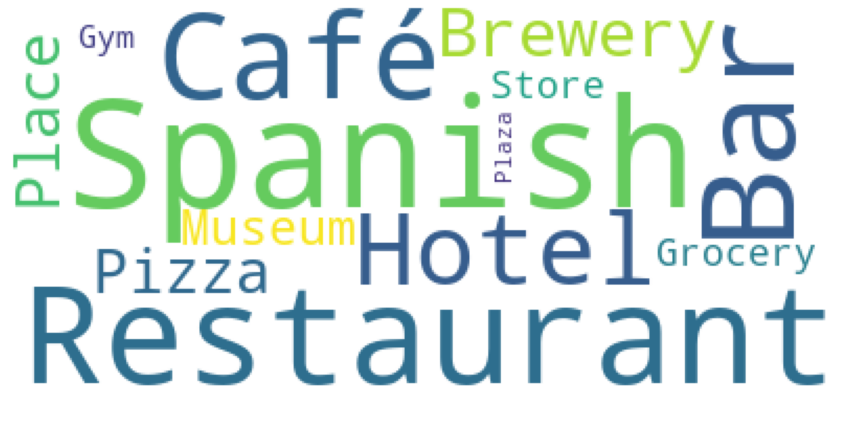

In [49]:
list_venues = []
for index, row in cluster_3.iterrows():
    #loop over top 10 venues:
    for i in range(1,11):
        #let's create a ponderation to take into account the order
        #that is, we add several times the same word based on the order
        #(it would be more accurate to weight by the actual number of occurances)
        for k in range(0,i):
            list_venues.append(cluster_3.iloc[0, -i])
list_venues = (" ").join(list_venues)

# instantiate a word cloud object\n",
cluster3_wc = WordCloud(collocations=False, background_color='white', max_words=2000)
cluster3_wc.generate(list_venues)

plt.figure(figsize=(15,8))
plt.imshow(cluster3_wc)
plt.axis("off")
plt.savefig("cluster3.png", bbox_inches='tight')

Cluster 4

In [50]:
cluster_4 = madrid_merged.loc[madrid_merged['Cluster labels'] == 4, madrid_merged.columns[[1] + list(range(6, madrid_merged.shape[1]))]]

In [51]:
cluster_4

,District,1st Most Common Venues,2nd Most Common Venues,3rd Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
3,Salamanca,Spanish Restaurant,Restaurant,Seafood Restaurant,Mediterranean Restaurant,Boutique,Burger Joint,Tapas Restaurant,Coffee Shop,Bakery,Bar


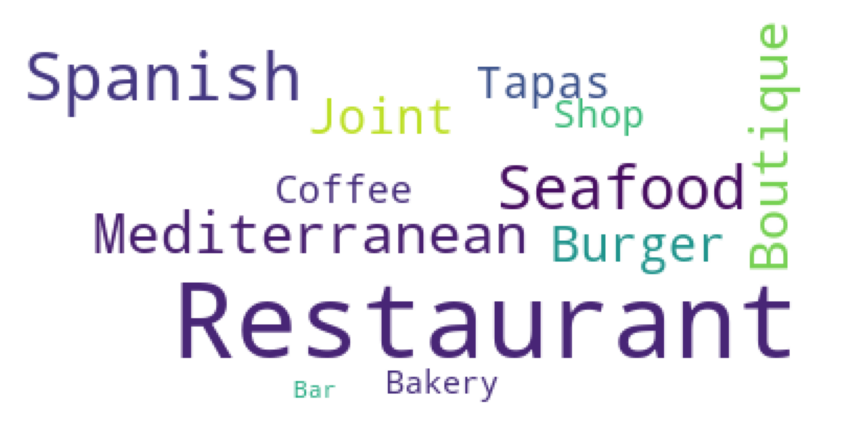

In [52]:
list_venues = []
for index, row in cluster_4.iterrows():
    #loop over top 10 venues:
    for i in range(1,11):
        #let's create a ponderation to take into account the order
        #that is, we add several times the same word based on the order
        #(it would be more accurate to weight by the actual number of occurances)
        for k in range(0,i):
            list_venues.append(cluster_4.iloc[0, -i])
list_venues = (" ").join(list_venues)

# instantiate a word cloud object\n",
cluster4_wc = WordCloud(collocations=False, background_color='white', max_words=2000)
cluster4_wc.generate(list_venues)

plt.figure(figsize=(15,8))
plt.imshow(cluster4_wc)
plt.axis("off")
plt.savefig("cluster4.png", bbox_inches='tight')